Predicting heart disease using machine learning

This notebook looks into using various Python-based machine learning and data science libraries in an attempt t build a mchine learning model capble of prediting whether or not someone has heart disease based n their medical atttributes  

We're going to take the following approach:
1. problem definition
2. data
3. Evaluation
4. Features
5. Modelling
6. Experimentation


##1.Problem definition 
In a statement,
>Given clinical parameters about a patient , can we predict whether or not they have heart disease?

#2. Data 

The original data came form the Clevland data from UCI Machine Learning repsitory. https://archive.ics.uci.edu/ml/datasets/Heart+Disease

There is a version of it availble on Kaggle.
https://www.kaggle.com/datasets?search=heart+disease&fileType=csv

##3.Evaluation

>If we can reach 95% accuracy at predicting whether or not a patient has  heart disease during the prof of concept, we'll pursue the project


##4. Features
This is where you'll get different information about each features in the data.

**Create data dictionary 

* age: age in years
* sex: sex (1 = male; 0 = female)
* cp: chest pain type
* trestbps: resting blood pressure (in mm Hg on admission to   the hospital)
* chol: serum cholestoral in mg/dl
* fbs: (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
* restecg: resting electrocardiographic results
* thalach: maximum heart rate achieved
* exang: exercise induced angina (1 = yes; 0 = no)
* oldpeak = ST depression induced by exercise relative to rest
*  slope: the slope of the peak exercise ST segment
*  ca: number of major vessels (0-3) colored by flourosopy
* thal: 3 = normal; 6 = fixed defect; 7 = reversable defect


# Preparing the tools
We're going to use pandas, Matplotlib and numpy for data analysis nd manipulation.



In [3]:
!pip install seaborn

In [5]:
#import all tools we need

#Reglar EDA (explanatory data analysis) and plotting libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# For plot to appear inside the notebook
%matplotlib inline

#Models from Scikit-learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB


#Model Evaluations 
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report 
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.metrics import plot_roc_curve


#Load Data

In [6]:
#(rows,columns)
df = pd.read_csv("heart.csv")
df.shape 


(1025, 14)

## Data Exploration (explatory data analysis or EDA)
The goal here is to learn more about data and become a subject matter export on dataset we are working with.


1. What question are you trying to solve ?
2. What kind of data do we have and how do we treat different types?
3. What is missing form data and how do you deal with it?
4. how can you add, change or remove features to get more out  of your data? 



In [7]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [9]:
#Lets find out how many of each class there 
df["target"].value_counts()

1    526
0    499
Name: target, dtype: int64

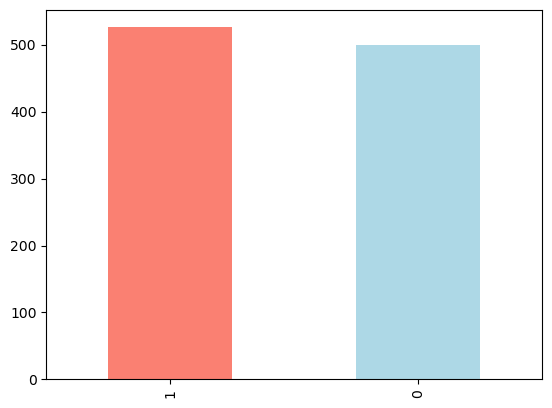

In [10]:
df['target'].value_counts().plot(kind="bar", color=["salmon","lightblue"]);

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [12]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [13]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


##Heart Disease Frequency according t sex

In [15]:
df.sex.value_counts()

1    713
0    312
Name: sex, dtype: int64

In [16]:
#compare target column with sex column
pd.crosstab(df.target, df.sex)

sex,0,1
target,,
0,86,413
1,226,300


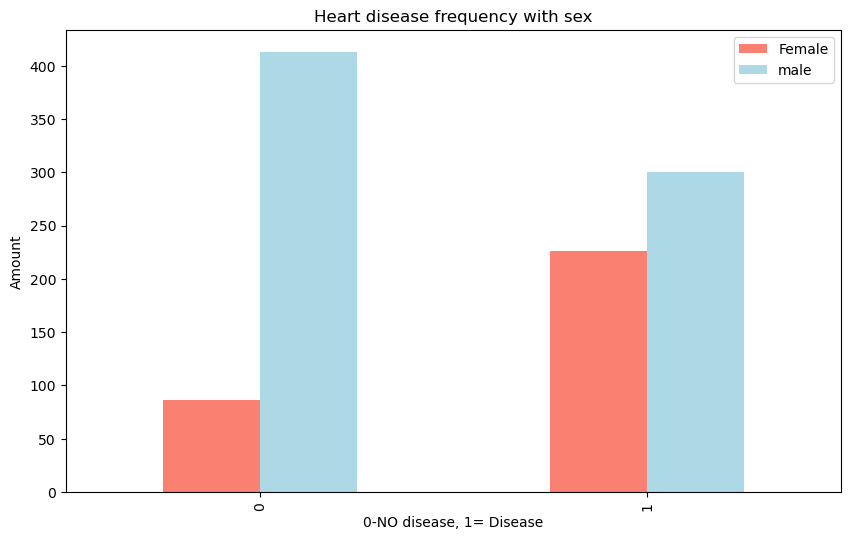

In [19]:
# Create a plot of crosstab
pd.crosstab(df.target,df.sex).plot(kind="bar",figsize=(10,6),color=["salmon","lightblue"]);
plt.title("Heart disease frequency with sex")
plt.xlabel("0-NO disease, 1= Disease")
plt.ylabel("Amount")
plt.legend(["Female","male"]);

#Age vs.Max Heart Rate for Heart Disease

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
#(rows,columns)
df = pd.read_csv("heart.csv")
df.shape 

(1025, 14)

In [6]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


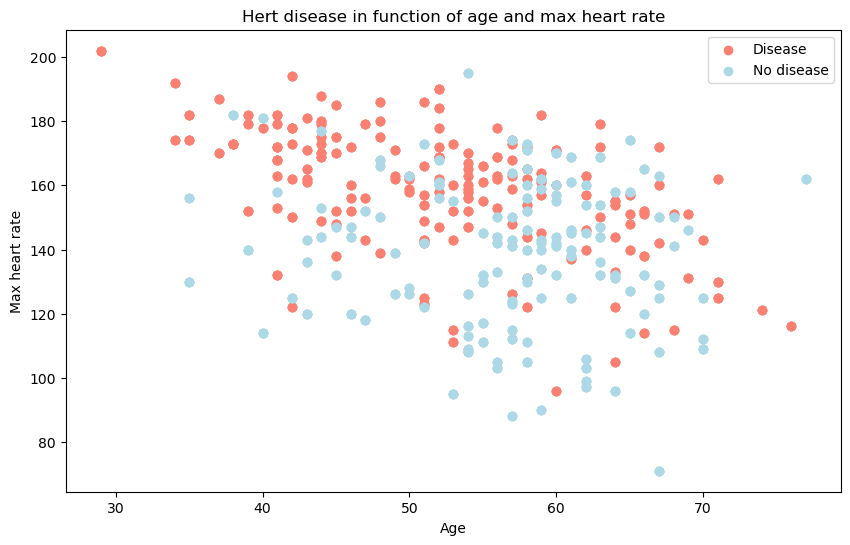

In [9]:
#create another figure
plt.figure(figsize=(10,6))

#scatter with positive examples
plt.scatter(df.age[df.target==1],df.thalach[df.target==1],c="salmon")

#scatter with negative examples
plt.scatter(df.age[df.target==0],df.thalach[df.target==0],c="lightblue");

#Add some helpful info
plt.title("Hert disease in function of age and max heart rate")
plt.xlabel("Age")
plt.ylabel("Max heart rate")
plt.legend(["Disease","No disease"]);

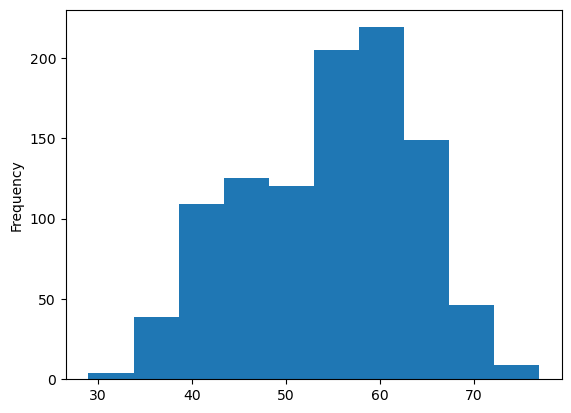

In [10]:
#check disttribution of age column with a histogram

df.age.plot.hist();

# Heart diseasse fequency per chest pain


In [12]:
pd.crosstab(df.cp,df.target)

target,0,1
cp,,
0,375,122
1,33,134
2,65,219
3,26,51


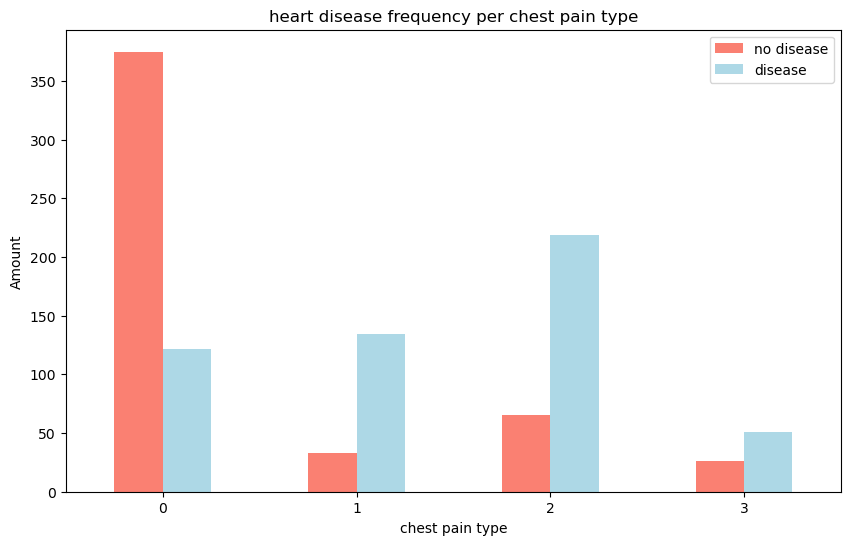

In [14]:
#make the crosstab more visual
pd.crosstab (df.cp,df.target).plot(kind=
                                  "bar",figsize=(10,6),color=["salmon","lightblue"])

#add communication

plt.title("heart disease frequency per chest pain type")
plt.xlabel("chest pain type")
plt.ylabel("Amount")
plt.legend(["no disease","disease"])
plt.xticks(rotation=0);

In [15]:
#make a correlation matrix
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.103240,-0.071966,0.271121,0.219823,0.121243,-0.132696,-0.390227,0.088163,0.208137,-0.169105,0.271551,0.072297,-0.229324
sex,-0.103240,1.000000,-0.041119,-0.078974,-0.198258,0.027200,-0.055117,-0.049365,0.139157,0.084687,-0.026666,0.111729,0.198424,-0.279501
cp,-0.071966,-0.041119,1.000000,0.038177,-0.081641,0.079294,0.043581,0.306839,-0.401513,-0.174733,0.131633,-0.176206,-0.163341,0.434854
trestbps,0.271121,-0.078974,0.038177,1.000000,0.127977,0.181767,-0.123794,-0.039264,0.061197,0.187434,-0.120445,0.104554,0.059276,-0.138772
chol,0.219823,-0.198258,-0.081641,0.127977,1.000000,0.026917,-0.147410,-0.021772,0.067382,0.064880,-0.014248,0.074259,0.100244,-0.099966
fbs,0.121243,0.027200,0.079294,0.181767,0.026917,1.000000,-0.104051,-0.008866,0.049261,0.010859,-0.061902,0.137156,-0.042177,-0.041164
restecg,-0.132696,-0.055117,0.043581,-0.123794,-0.147410,-0.104051,1.000000,0.048411,-0.065606,-0.050114,0.086086,-0.078072,-0.020504,0.134468
thalach,-0.390227,-0.049365,0.306839,-0.039264,-0.021772,-0.008866,0.048411,1.000000,-0.380281,-0.349796,0.395308,-0.207888,-0.098068,0.422895
exang,0.088163,0.139157,-0.401513,0.061197,0.067382,0.049261,-0.065606,-0.380281,1.000000,0.310844,-0.267335,0.107849,0.197201,-0.438029
oldpeak,0.208137,0.084687,-0.174733,0.187434,0.064880,0.010859,-0.050114,-0.349796,0.310844,1.000000,-0.575189,0.221816,0.202672,-0.438441


(14.5, -0.5)

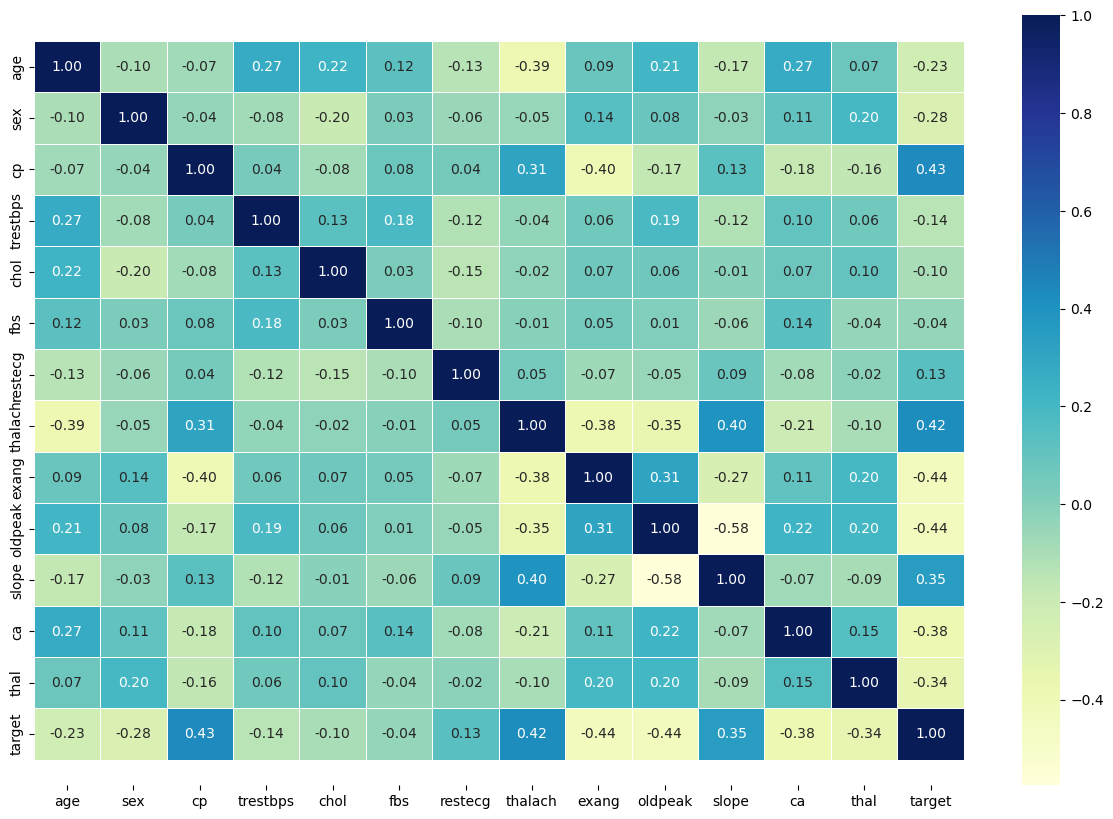

In [16]:
#lets make our correltin matrix a little prettier

corr_matrix=df.corr()
fig, ax =plt.subplots(figsize=(15,10))
ax =sns.heatmap(corr_matrix, annot=True,linewidths=0.5,fmt=".2f", cmap ="YlGnBu");
bottom,top =ax.get_ylim()
ax.set_ylim(bottom+0.5, top-0.5)

# 5.Modelling

In [17]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [18]:
##split daata in x and y
x=df.drop("target",axis=1)
y=df["target"]

In [19]:
x


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2


In [20]:
y

0       0
1       0
2       0
3       0
4       0
       ..
1020    1
1021    0
1022    0
1023    1
1024    0
Name: target, Length: 1025, dtype: int64

In [5]:
#(rows,columns)
df = pd.read_csv("heart.csv")
df.shape 

(1025, 14)

Now we've got our data split into training and test sets,its time to build ML model.
We'll train it (find th e patterns )on the trainig set.
And we'll test it(use the patterns )n the test

In [3]:
#(rows,columns)
df = pd.read_csv("heart.csv")
df.shape 

(1025, 14)

In [7]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [8]:
##split daata in x and y
x=df.drop("target",axis=1)
y=df["target"]

In [9]:
#split data into test and train sets
np.random.seed(42)

#split int trin and test set

X_train ,X_test, y_train ,y_test=train_test_split(x,y,test_size=0.2)

In [1]:
#import all tools we need

#Reglar EDA (explanatory data analysis) and plotting libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# For plot to appear inside the notebook
%matplotlib inline

#Models from Scikit-learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB


#Model Evaluations 
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report 
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.metrics import plot_roc_curve


In [2]:
#(rows,columns)
df = pd.read_csv("heart.csv")
df.shape 


(1025, 14)

We're going to try different machine learnig models:
1. Logistic Regression 
2. K-Nearest neighbours Classifier
3. Random Forest Classifier
4. Gussian NB


In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [1]:
#put models in a dictionary
models = {"Logistic Regression":LogisticRegression(),
          "KNN":KNeighborsClassifier(),
          "Random Forest":RandomForestClassifier(),
          "Naive Bayes":GaussianNB()}

# Create a function to fit and score models
def fit_and_score(models, X_train, X_test, y_train, y_test): 
    """
    Fits and evaluates given machine learning models.
    models: a dict of different Scikit-Learn machine learning models
    X_train: training data(with no labels)
    X_test: testing data(with no labels)
    y_train: training labels
    y_test: testing labels
    """
    #set random seed
    np.random.seed(29)

    # Making a dictionary to keep model scoresS
    model_scores = {}

    # Loop through models
    for name, model in models.items():
        # Fit the model to the data
        model.fit(X_train, y_train)

        #Evaluate the model and  append  it's score to model_scores
        model_scores[name] = model.score(X_test, y_test)
    return model_scores


NameError: name 'LogisticRegression' is not defined

In [2]:
##split daata in x and y
X=df.drop("target",axis=1)
y=df["target"]

NameError: name 'df' is not defined

In [8]:
#split data into test and train sets
np.random.seed(42)

#split int trin and test set

X_train ,X_test, y_train ,y_test=train_test_split(X,y,test_size=0.2)

In [11]:
X_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
835,49,1,2,118,149,0,0,126,0,0.8,2,3,2
137,64,0,0,180,325,0,1,154,1,0.0,2,0,2
534,54,0,2,108,267,0,0,167,0,0.0,2,0,2
495,59,1,0,135,234,0,1,161,0,0.5,1,0,3
244,51,1,2,125,245,1,0,166,0,2.4,1,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
700,41,1,2,130,214,0,0,168,0,2.0,1,0,2
71,61,1,0,140,207,0,0,138,1,1.9,2,1,3
106,51,1,0,140,299,0,1,173,1,1.6,2,0,3
270,43,1,0,110,211,0,1,161,0,0.0,2,0,3


In [12]:
y_train,len(y_train)

(835    0
 137    1
 534    1
 495    1
 244    1
       ..
 700    1
 71     0
 106    0
 270    1
 860    0
 Name: target, Length: 820, dtype: int64,
 820)

In [18]:
model_scores = fit_and_score(models=models,
                             X_train=x_train,
                             X_test=x_test,
                             y_train=y_train,
                             y_test=y_test)

C:\Users\Jenna\Desktop\heart-disease-project\env\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [19]:
model_scores

{'Logistic Regression': 0.7804878048780488,
 'KNN': 0.7317073170731707,
 'Random Forest': 0.9853658536585366,
 'Naive Bayes': 0.8}

# Model comparision

(array([0, 1, 2, 3]),
 [Text(0, 0, 'Logistic Regression'),
  Text(1, 0, 'KNN'),
  Text(2, 0, 'Random Forest'),
  Text(3, 0, 'Naive Bayes')])

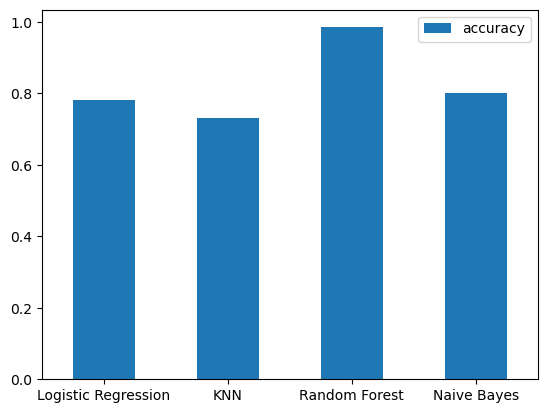

In [20]:
model_compare = pd.DataFrame(model_scores, index=["accuracy"])
model_compare.T.plot.bar()

plt.xticks(rotation=0)

NOw we'ev got a baseline model...and we know a model's first predictios aren't always what we should bsed our next steps off.
What should we do?

Let's look at the following:
1. Hyperparmeter tuning
2. Feature importance
3. Confusion matrix
4. Cross-validation
5. Precision
6. Recall
7. F1 score
8. Classification report
9. ROC curve
10. Area under the curve (Auc)


In [2]:
#(rows,columns)
df = pd.read_csv("heart.csv")
df.shape 


(1025, 14)

In [3]:
#put models in a dictionary
models = {"Logistic Regression":LogisticRegression(),
          "KNN":KNeighborsClassifier(),
          "Random Forest":RandomForestClassifier(),
          "Naive Bayes":GaussianNB()}

# Create a function to fit and score models
def fit_and_score(models, X_train, X_test, y_train, y_test): 
    """
    Fits and evaluates given machine learning models.
    models: a dict of different Scikit-Learn machine learning models
    X_train: training data(with no labels)
    X_test: testing data(with no labels)
    y_train: training labels
    y_test: testing labels
    """
    #set random seed
    np.random.seed(42)

    # Making a dictionary to keep model scoresS
    model_scores = {}

    # Loop through models
    for name, model in models.items():
        # Fit the model to the data
        model.fit(X_train, y_train)

        #Evaluate the model and  append  it's score to model_scores
        model_scores[name] = model.score(X_test, y_test)
    return model_scores


In [4]:
##split daata in x and y
X=df.drop("target",axis=1)
y=df["target"]

In [5]:
#split data into test and train sets
np.random.seed(42)

#split int trin and test set

X_train ,X_test, y_train ,y_test=train_test_split(X,y,test_size=0.2)

In [6]:
X_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
835,49,1,2,118,149,0,0,126,0,0.8,2,3,2
137,64,0,0,180,325,0,1,154,1,0.0,2,0,2
534,54,0,2,108,267,0,0,167,0,0.0,2,0,2
495,59,1,0,135,234,0,1,161,0,0.5,1,0,3
244,51,1,2,125,245,1,0,166,0,2.4,1,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
700,41,1,2,130,214,0,0,168,0,2.0,1,0,2
71,61,1,0,140,207,0,0,138,1,1.9,2,1,3
106,51,1,0,140,299,0,1,173,1,1.6,2,0,3
270,43,1,0,110,211,0,1,161,0,0.0,2,0,3


In [7]:
y_train,len(y_train)

(835    0
 137    1
 534    1
 495    1
 244    1
       ..
 700    1
 71     0
 106    0
 270    1
 860    0
 Name: target, Length: 820, dtype: int64,
 820)

In [11]:
model_scores = fit_and_score(models=models,
                             X_train=X_train,
                             X_test=X_test,
                             y_train=y_train,
                             y_test=y_test)

C:\Users\Jenna\Desktop\heart-disease-project\env\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [12]:
model_scores

{'Logistic Regression': 0.7804878048780488,
 'KNN': 0.7317073170731707,
 'Random Forest': 0.9853658536585366,
 'Naive Bayes': 0.8}

# Hyperparameter tuning

In [15]:
#Let's tune KNN

train_scores = []
test_scores = []

# Creates a list of different values for n_neighbors
neighbors = range(1,21)

#Setup KNN instance
knn = KNeighborsClassifier()

#Loop through different n_neighbors
for i in neighbors:
    knn.set_params(n_neighbors=i)
    
    #Fit the algorithm
    knn.fit(X_train, y_train)
    
    #Update the training scores list
    train_scores.append(knn.score(X_train, y_train))
    
    #Update the test scores list
    test_scores.append(knn.score(X_test, y_test))
    

In [16]:
train_scores

[1.0,
 0.9963414634146341,
 0.9914634146341463,
 0.947560975609756,
 0.9231707317073171,
 0.8207317073170731,
 0.7914634146341464,
 0.7926829268292683,
 0.7670731707317073,
 0.7853658536585366,
 0.775609756097561,
 0.7695121951219512,
 0.7609756097560976,
 0.7817073170731708,
 0.7670731707317073,
 0.7670731707317073,
 0.75,
 0.7597560975609756,
 0.7634146341463415,
 0.7682926829268293]

In [17]:
test_scores

[0.9853658536585366,
 0.9560975609756097,
 0.9024390243902439,
 0.8097560975609757,
 0.7317073170731707,
 0.6878048780487804,
 0.6780487804878049,
 0.6682926829268293,
 0.7170731707317073,
 0.7170731707317073,
 0.6878048780487804,
 0.6780487804878049,
 0.6780487804878049,
 0.7170731707317073,
 0.7073170731707317,
 0.6926829268292682,
 0.6780487804878049,
 0.7073170731707317,
 0.7121951219512195,
 0.7170731707317073]

# KNN

Maximum KNN score on the test data: 98.54%


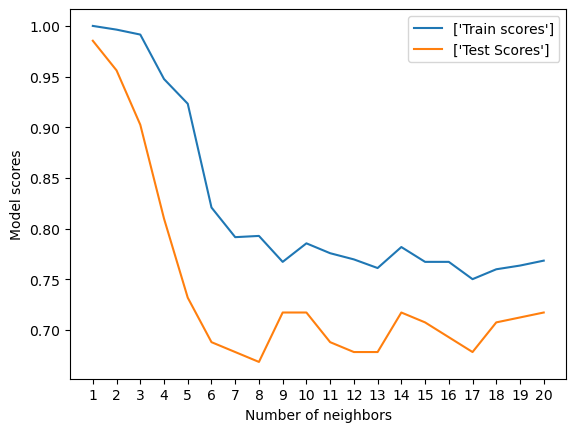

In [18]:
plt.plot(neighbors, train_scores, label=["Train scores"])
plt.plot(neighbors, test_scores, label=["Test Scores"])

plt.xticks(np.arange(1,21,1))
plt.xlabel("Number of neighbors")
plt.ylabel("Model scores")
plt.legend()

print(f"Maximum KNN score on the test data: {max(test_scores)*100:.2f}%")

# Hyperparameter tuning with RandomizedSearchCV

We're going to tune:
1. LogisticRegression()
2. RandomForestClassifier()
3. GaussianNb
.....using RandomizeSearchCV


In [20]:
# Create hyperparameter grid for LogisticRegression
log_reg_grid = {"C":np.logspace(-4,4,20),
                "solver":['liblinear']}

#Create a hyperparameter grid for RandomForestClassifier
rf_grid = {"n_estimators":np.arange(10,80,8),
           "max_depth":[None,3,5,10],
           "min_samples_split":np.arange(2,10,2),
           "min_samples_leaf":np.arange(1,10,2)}

# Create hyperparameter grid for Naive Bayes
param_NB = {"var_smoothing":np.logspace(0,-9,100)}

Now we've got hyperparameters grids setup for each of our models,let's tunr them using RandomizedSearchCV

# Logistic Regression

In [23]:
# Tune LogisticRegression 

np.random.seed(42)

# Setup random hyperparameter search for LogisticRegression
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                                param_distributions=log_reg_grid,
                                cv=5,
                                n_iter=20,
                                verbose=True)

#Fit random hyperparameter search model for LogisticRegression 
rs_log_reg.fit(X_train,y_train)


Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [24]:
# Find the best parameters
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 1.623776739188721}

In [25]:
# Evaluate the randomized search LogisticRegression Model
rs_log_reg.score(X_test, y_test)

0.7853658536585366

Now we've tuned LogisticRegression(),let's do the same for RandomForestClassifier()

# RandomForestClassifier()

In [27]:
# Tuning RandomForestClassifier

# Setup random seed
np.random.seed(42)

#Setup random hyperparameter search for RandomForestClassifier
rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                           param_distributions=rf_grid,
                           cv=10,
                           n_iter=100,
                           verbose=True)

#Fit random hyperparameter search model for RandomForestClassifier
rs_rf.fit(X_train, y_train)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits


RandomizedSearchCV(cv=10, estimator=RandomForestClassifier(), n_iter=100,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([1, 3, 5, 7, 9]),
                                        'min_samples_split': array([2, 4, 6, 8]),
                                        'n_estimators': array([10, 18, 26, 34, 42, 50, 58, 66, 74])},
                   verbose=True)

In [28]:
#Find the best hyperparameters
rs_rf.best_params_

{'n_estimators': 26,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_depth': None}

In [29]:
#Evaluate the randomized search RandomForestClassifier
rs_rf.score(X_test,y_test)

0.9853658536585366

In [30]:
model_scores

{'Logistic Regression': 0.7804878048780488,
 'KNN': 0.7317073170731707,
 'Random Forest': 0.9853658536585366,
 'Naive Bayes': 0.8}

# Naive Bayes()

In [31]:
#Tuning Naive Bayes

#Setup the random seed
np.random.seed(42)

#Setup the random hyperparameter search for NaiveBayed
rs_nb = RandomizedSearchCV(GaussianNB(),
                           param_distributions=param_NB,
                           cv=2,
                           n_iter=100,
                           verbose=True)

#Fit random hyperparameter search model for NaiveBayes
rs_nb.fit(X_train, y_train)

Fitting 2 folds for each of 100 candidates, totalling 200 fits


RandomizedSearchCV(cv=2, estimator=GaussianNB(), n_iter=100,
                   param_distributions={'var_smoothing': array([1.00000000e+00, 8.11130831e-01, 6.57933225e-01, 5.33669923e-01,
       4.32876128e-01, 3.51119173e-01, 2.84803587e-01, 2.31012970e-01,
       1.87381742e-01, 1.51991108e-01, 1.23284674e-01, 1.00000000e-01,
       8.11130831e-02, 6.57933225e-02, 5.33669923e-02, 4.32876128e-02,
       3.511191...
       1.23284674e-07, 1.00000000e-07, 8.11130831e-08, 6.57933225e-08,
       5.33669923e-08, 4.32876128e-08, 3.51119173e-08, 2.84803587e-08,
       2.31012970e-08, 1.87381742e-08, 1.51991108e-08, 1.23284674e-08,
       1.00000000e-08, 8.11130831e-09, 6.57933225e-09, 5.33669923e-09,
       4.32876128e-09, 3.51119173e-09, 2.84803587e-09, 2.31012970e-09,
       1.87381742e-09, 1.51991108e-09, 1.23284674e-09, 1.00000000e-09])},
                   verbose=True)

In [32]:
#Finding the best hyperparameters
rs_nb.best_params_

{'var_smoothing': 5.336699231206313e-06}

In [33]:
#Evaluate the randomized search for Naive Bayes
rs_nb.score(X_test,y_test)

0.8

In [34]:
model_scores


{'Logistic Regression': 0.7804878048780488,
 'KNN': 0.7317073170731707,
 'Random Forest': 0.9853658536585366,
 'Naive Bayes': 0.8}

# Hyper tuning with GridSearchCV 

Since our RandomForest model provides the best scores so far, we'll try and improve them again using GridSearchCV

In [35]:
#Different hyperparameter for our RandomForestClassifier model
rf_grid = {"n_estimators":np.arange(10,80,8),
           "max_depth":[None,3,5,10],
           "min_samples_split":np.arange(2,10,2),
           "min_samples_leaf":np.arange(1,10,2)}

#Setup grid hyperparameter search for RandomForestClassifier

np.random.seed(42)

gs_rf = GridSearchCV(RandomForestClassifier(),
                           param_grid=rf_grid,
                           cv=10,
                           verbose=True,
                           n_jobs=4)
#Fit grid hyperparameter search model for RandomForestClassifer
gs_rf.fit(X_train, y_train)

Fitting 10 folds for each of 720 candidates, totalling 7200 fits


GridSearchCV(cv=10, estimator=RandomForestClassifier(), n_jobs=4,
             param_grid={'max_depth': [None, 3, 5, 10],
                         'min_samples_leaf': array([1, 3, 5, 7, 9]),
                         'min_samples_split': array([2, 4, 6, 8]),
                         'n_estimators': array([10, 18, 26, 34, 42, 50, 58, 66, 74])},
             verbose=True)

In [36]:
#Find the best hyperparameter for RandomForestClassifier
gs_rf.best_params_

{'max_depth': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 66}

In [37]:
#Evaluate the Grid Search RandomForestClassifier
gs_rf.score(X_test,y_test)

0.9853658536585366

In [38]:
## ideal hyperparameter
ideal_model = RandomForestClassifier(n_estimators=18,
                                    min_samples_split=2,
                                    min_samples_leaf=7,
                                    max_depth=None,
                                    n_jobs=-1,
                                    random_state=42,
                                    max_samples=None)

In [39]:
## Fit the model
ideal_model.fit(X_train, y_train)

RandomForestClassifier(min_samples_leaf=7, n_estimators=18, n_jobs=-1,
                       random_state=42)

In [40]:
ideal_model.score(X_test, y_test)

0.8634146341463415

# Evaluatind our tuned machine learning classifier, beyond accuracy

1. ROC curve and AUC score
2. Confusion matrix
3. Classification Report
4. PRecision
5. Recall
6. F1-score


...and it would be great if cross-validation was used where possiblle

To make comparision and evaluate our trained model,first we need to make predictions

In [42]:
# Make predictions with tuned models
y_predicts = gs_rf.predict(X_test)

In [43]:
y_predicts

array([1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 0], dtype=int64)

In [44]:
y_test

527    1
359    1
447    0
31     1
621    0
      ..
832    1
796    1
644    1
404    0
842    0
Name: target, Length: 205, dtype: int64

C:\Users\Jenna\Desktop\heart-disease-project\env\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


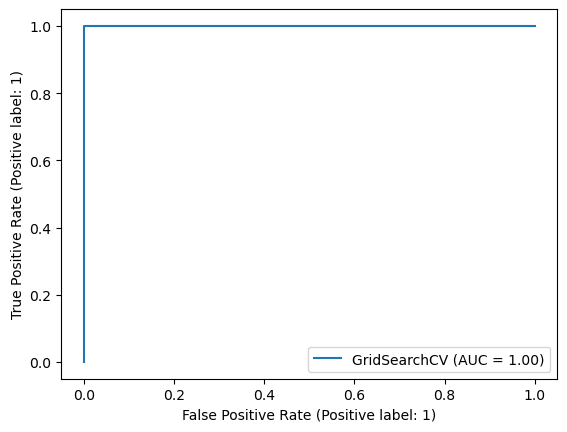

In [45]:
#import ROC curve function from the sklearn.metrics module 
# Plot ROC curve and calculate the AUC(area under curve) metric
plot_roc_curve(gs_rf, X_test, y_test)

In [46]:
#Confusion Matrix
print(confusion_matrix(y_test, y_predicts))

[[102   0]
 [  3 100]]


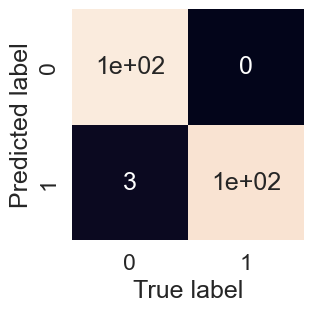

In [47]:
sns.set(font_scale=1.5)

def plot_conf_mat(y_test, y_predicts):
  """
  Plot a confusion matrix using Seaborn's heatmap()
  """
  fig, ax = plt.subplots(figsize=(3,3))
  ax = sns.heatmap(confusion_matrix(y_test,y_predicts),
                  annot=True,
                   cbar=False)
  plt.xlabel("True label")
  plt.ylabel("Predicted label")

plot_conf_mat(y_test, y_predicts)

NOw we've got a ROC curve and AUC metric and a confusion matrix,  let's get a classfication report a well as cross-validated precision,recall, and F1 score

In [48]:
print(classification_report(y_test, y_predicts))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99       102
           1       1.00      0.97      0.99       103

    accuracy                           0.99       205
   macro avg       0.99      0.99      0.99       205
weighted avg       0.99      0.99      0.99       205



Classification of y_predicts only done in one testing set ecaus we only made test prediction

this is only for one split

# Calculate evaluation metric using cross-validation

We're going to calculate precision,recall and f1-score of our model using cross-validation and to do so we'll be using cross_val_score()

In [49]:
#check best hyperparmeters
gs_rf.best_params_

{'max_depth': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 66}

In [50]:
#Create a new classifier with best parameters
clf = RandomForestClassifier(max_depth=None,
                             min_samples_leaf=7,
                             min_samples_split=2,
                             n_estimators=18)


In [51]:
## Cross-validated accuracy

cv_accuracy = cross_val_score(clf,
                         X,
                         y,
                         cv=5,
                         scoring="accuracy")
cv_accuracy 

array([0.95609756, 0.91219512, 0.91219512, 0.89268293, 0.90243902])

In [52]:
cv_accuracy = np.mean(cv_accuracy)
cv_accuracy

0.9151219512195121

In [53]:
## Cross-validated precision

cv_precision = cross_val_score(clf,
                               X,
                               y,
                               cv=5,
                               scoring="precision")
cv_precision = np.mean(cv_precision)
cv_precision

0.9198703851038614

In [54]:
## Cross-validated recall

cv_recall = cross_val_score(clf,
                               X,
                               y,
                               cv=5,
                               scoring="recall")
cv_recall = np.mean(cv_recall)
cv_recall

0.9392812219227313

In [55]:
## Cross-validated f1-score

cv_f1 = cross_val_score(clf,
                               X,
                               y,
                               cv=5,
                               scoring="f1")
cv_f1 = np.mean(cv_f1)
cv_f1

0.9174251830517447

(array([0, 1, 2, 3]),
 [Text(0, 0, 'Accuracy'),
  Text(1, 0, 'Precision'),
  Text(2, 0, 'Recall'),
  Text(3, 0, 'F1')])

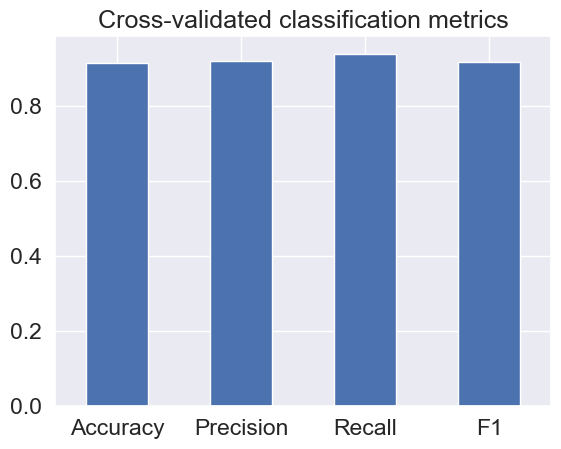

In [56]:
# Visualizing the cross-validated metrics 


cv_metrics = pd.DataFrame({"Accuracy":cv_accuracy,
                           "Precision":cv_precision,
                           "Recall":cv_recall,
                           "F1":cv_f1},
                          index=[0])
cv_metrics.T.plot.bar(title="Cross-validated classification metrics",
                      legend=False)
plt.xticks(rotation=0)

# Features importance

Feature importance is another as asking,"which features contributed most to outcome of model and how did they contribute?" 

Fnding feature importance is different for each machine learning model.one way to find feature importance is to search for"(Model Name)feature importance" 

In [57]:
# Find the feature importance of our best model
ideal_model.feature_importances_

array([0.0654561 , 0.03116452, 0.17265659, 0.04312541, 0.05974271,
       0.00530917, 0.0127502 , 0.11139135, 0.07112935, 0.11194419,
       0.05648889, 0.14522441, 0.11361712])

In [63]:



## functions to plot the features importances
def plot_features(columns, importances, n=13):
    df = (pd.DataFrame({"features": columns,
                        "features_importance": importances})
         .sort_values("features_importance", ascending=False)
         .reset_index(drop=True))
    
    # Plot the dataframe
    fig, ax = plt.subplots()
    ax.barh(df["features"][:n], df["features_importance"][:14])
    ax.set_ylabel("features")
    ax.set_xlabel("feautures_importance")
    ax.invert_yaxis()

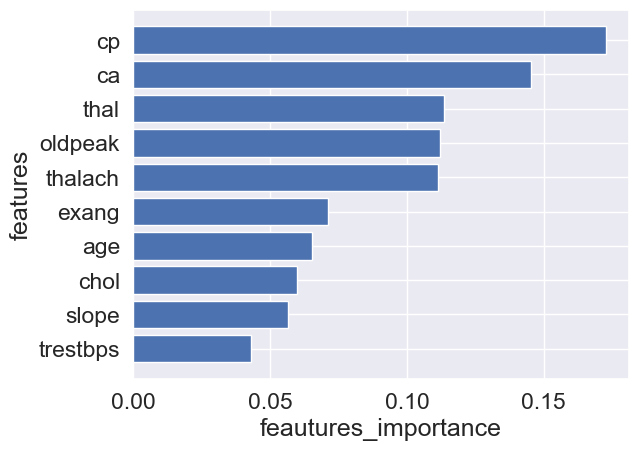

In [60]:
plot_features(X_train.columns, ideal_model.feature_importances_)

# 6.Experimentation